## SALES ANALYSIS

`Import Libraries`

In [4]:
import pandas as pd
import os

`Task 1 - merge the 12 months of data into a single csv file`

In [5]:
# READING A FILE OF DATA
df = pd.read_csv("./sales_data/Sales_April_2019.csv")

# CONCATENATING FILES
# -- storing file names from a directory in a list
files = [file for file in os.listdir('./sales_data')]

# -- create an empty dataframe
all_months_data = pd.DataFrame()

# -- a for loop to concatenate all 12 files into a new file
for file in files:
    df = pd.read_csv('./sales_data/'+file)
    # all_months_data = all_months_data.append(df) -- another way to concat
    all_months_data = pd.concat([all_months_data, df])

# -- saving the dataframe into new csv file
all_months_data.to_csv("all_data.csv", index=False)

In [6]:
# -- read updated dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


`Clean up data`

In [7]:
# DROP NAN ROWS
# -- add rows with nan into new df
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# -- drop the rows from the all data df
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# remove '/4' from data -- error displayed when adding a month column
all_data = all_data[all_data['Order Date'].str[0:2] != '4/']

In [9]:
# remove '/5' from data -- error displayed when adding a month column
all_data = all_data[all_data['Order Date'].str[0:2] != '5/']

In [10]:
# remove 'Or' from data -- error displayed when adding a month column
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [11]:
# remove '/4' entirely from the data
all_data.drop(all_data[(all_data['Order Date'].str[0:2] == '4/')].index, inplace=True)

In [12]:
# remove '/5' entirely from the data
all_data.drop(all_data[(all_data['Order Date'].str[0:2] == '5/')].index, inplace=True)

`Task 2 - add a month column`

In [13]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176567,Google Phone,1,600,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4


`Task 3 - add a sales column`

In [14]:
# -- convert columns to the correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
# -- create a new column and inserting values by multiplying 2 data
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00


In [16]:
# -- reset index values
all_data.reset_index(drop=True, inplace=True)

In [17]:
# -- view data after resetting index values
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
2,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
3,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
4,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00


`Question 1 - what was the best month for sales? how much was earned that month?`

In [18]:
# -- display month with most sales using groupby
results = all_data.groupby('Month').sum()['Sales']
results

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     2071078.04
5     3142047.46
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

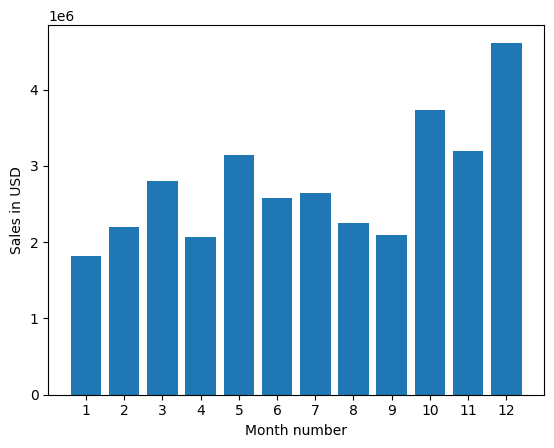

In [19]:
# VISUALIZING DATA USING THE MATPLOTLIB MODULE

import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')

plt.show()

`Question 2 - what city has the highest sales/sold most products?`

In [20]:
# ADD A CITY COLUMN

# -- function to split the city from the address
def get_city(address):
    return address.split(',')[1]

# -- function to split the state from address
def get_state(address):
    return address.split(',')[2].split(' ')[1]

# -- use .apply() method to create new column with values from the address utilizing the 2 functions created
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
2,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
3,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA)
4,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [21]:
# ANSWERING THE QUESTION

# -- display city with most sales using groupby
results = all_data.groupby('City').sum()['Sales']
results

City
Atlanta (GA)          2678051.00
Austin (TX)           1755849.14
Boston (MA)           3536253.97
Dallas (TX)           2672410.09
Los Angeles (CA)      5246595.14
New York City (NY)    4480694.56
Portland (ME)          430023.89
Portland (OR)         1790716.66
San Francisco (CA)    7925253.99
Seattle (WA)          2646036.04
Name: Sales, dtype: float64

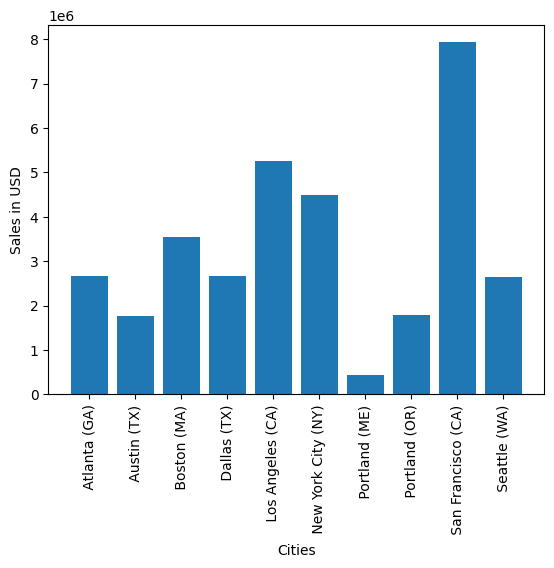

In [22]:
# VISUALIZING DATA USING THE MATPLOTLIB MODULE

import matplotlib.pyplot as plt

# -- x values
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results)
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('Cities')

plt.show()

`Question 3 - What time should we display advertisements to maximize the likelihood of purchases?`

In [24]:
# -- convert the order date column to datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\New HP\AppData\Local\Temp\ipykernel_24580\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [30]:
# -- create new hour column
all_data['Hour'] = all_data['Order Date'].dt.hour

# -- create new minute column
all_data['Minute'] = all_data['Order Date'].dt.minute

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
2,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
3,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
4,176567,Google Phone,1,600.00,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),17,18


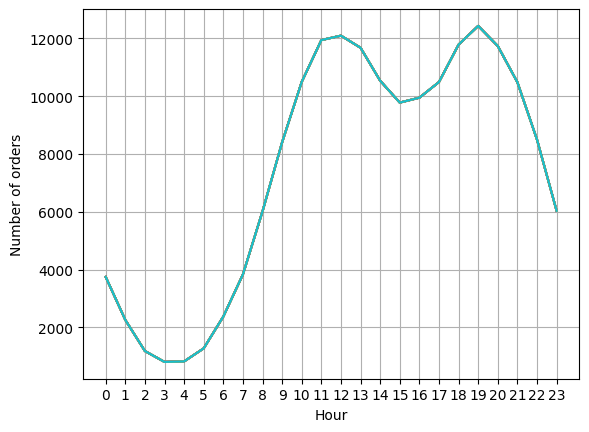

In [36]:
# VISUALIZING DATA USING THE MATPLOTLIB MODULE

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of orders')
plt.xlabel('Hour')

plt.show()

`Question 4 - which products are most often sold together?`

In [43]:
# -- create new dataframe that does not have any duplicate order ID
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
74,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle (WA),10,39
75,176681,ThinkPad Laptop,1,999.99,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,999.99,Seattle (WA),10,39
82,176689,Bose SoundSport Headphones,1,99.99,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001",4,99.99,New York City (NY),17,15
83,176689,AAA Batteries (4-pack),2,2.99,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001",4,5.98,New York City (NY),17,15
138,176774,Lightning Charging Cable,1,14.95,2019-04-25 15:06:00,"372 Church St, Los Angeles, CA 90001",4,14.95,Los Angeles (CA),15,6


In [44]:
# -- create a new column where the order id is grouped by product
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

C:\Users\New HP\AppData\Local\Temp\ipykernel_24580\3979233859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
74,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle (WA),10,39,"Apple Airpods Headphones,ThinkPad Laptop"
75,176681,ThinkPad Laptop,1,999.99,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,999.99,Seattle (WA),10,39,"Apple Airpods Headphones,ThinkPad Laptop"
82,176689,Bose SoundSport Headphones,1,99.99,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001",4,99.99,New York City (NY),17,15,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
83,176689,AAA Batteries (4-pack),2,2.99,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001",4,5.98,New York City (NY),17,15,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
138,176774,Lightning Charging Cable,1,14.95,2019-04-25 15:06:00,"372 Church St, Los Angeles, CA 90001",4,14.95,Los Angeles (CA),15,6,"Lightning Charging Cable,USB-C Charging Cable"


In [45]:
# -- drop all duplicates grouped
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
74,176681,"Apple Airpods Headphones,ThinkPad Laptop"
82,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
138,176774,"Lightning Charging Cable,USB-C Charging Cable"
152,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."
160,176808,"Google Phone,Wired Headphones"


In [53]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    # print(row_list)
# print(count)

# -- displays the most common
count.most_common()

[(('iPhone', 'Lightning Charging Cable'), 958),
 (('Google Phone', 'USB-C Charging Cable'), 937),
 (('iPhone', 'Wired Headphones'), 435),
 (('Google Phone', 'Wired Headphones'), 400),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 350),
 (('iPhone', 'Apple Airpods Headphones'), 339),
 (('Google Phone', 'Bose SoundSport Headphones'), 207),
 (('USB-C Charging Cable', 'Wired Headphones'), 155),
 (('Vareebadd Phone', 'Wired Headphones'), 137),
 (('Lightning Charging Cable', 'Wired Headphones'), 90),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 77),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 76),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 73),
 (('Apple Airpods Headphones', 'Wired Headphones'), 65),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 57),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 52),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 51),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 51),
 (('AA Ba